In [ ]:
# The first recommender systems is Netflix
#The second is Amazon
#Facebook
#Spotify

In [1]:
pip install pymysql


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


### Simulated Transaction ###

In [3]:
import pandas as pd 
import pymysql as mysqlconnector
import pandas as pd
import numpy as np

In [11]:
df_jumia = pd.read_csv("Jumia_FINAL.csv")
df_jumia.head()

,brand_name,Price,discount,image_url,Reviews_rating,Reviews_count
0,GUEETON Clé USB OTG en métal 128 Go étanche av...,2500,5%,https://ci.jumia.is/unsafe/fit-in/300x300/filt...,3.5,3052
1,GUEETON GUEETON Souris Sans Fil Rechargeable 2...,1710,5%,https://ci.jumia.is/unsafe/fit-in/300x300/filt...,4.0,3008
2,GUEETON 128 GB Metal Usb Flash Drive Adapter C...,2867,5%,https://ci.jumia.is/unsafe/fit-in/300x300/filt...,3.6,1659
3,GUEETON Souris Sans Fil Rechargeable 2.4G,1730,5%,https://ci.jumia.is/unsafe/fit-in/300x300/filt...,4.1,2126
4,GUEETON Clé USB - OTG 128 Go Micro USB Type C ...,2600,5%,https://ci.jumia.is/unsafe/fit-in/300x300/filt...,3.5,2210


In [ ]:
#For jumia

In [4]:
import pymysql
import pandas as pd

# Load your CSV files
df_jumia = pd.read_csv("jumia_rules_for_site.csv")
df_coin = pd.read_csv("coin_rules_for_site.csv")

# Connect to MySQL
connection = pymysql.connect(
    host="localhost",
    user="root",
    password="",   # add your password if needed
    database="Project_DM",
    charset="utf8mb4",
    autocommit=False
)

cursor = connection.cursor()

# -----------------------
# INSERT JUMIA RULES
# -----------------------

insert_jumia = """
INSERT INTO jumia_recommendations 
(product_id, recommended_id, support, confidence, lift)
VALUES (%s, %s, %s, %s, %s)
"""

for _, row in df_jumia.iterrows():

    values = (
        int(row["left_product_id"]),
        int(row["right_product_id"]),
        float(row["support"]),
        float(row["confidence"]),
        float(row["lift"])
    )

    try:
        cursor.execute(insert_jumia, values)
    except Exception as e:
        print("Skipping row (Jumia):", values, "Reason:", e)

print("Jumia rules inserted ✔")

# -----------------------
# INSERT COIN AFRIQUE RULES
# -----------------------

insert_coin = """
INSERT INTO coin_recommendations 
(product_id, recommended_id, support, confidence, lift)
VALUES (%s, %s, %s, %s, %s)
"""

for _, row in df_coin.iterrows():

    values = (
        int(row["left_car_id"]),
        int(row["right_car_id"]),
        float(row["support"]),
        float(row["confidence"]),
        float(row["lift"])
    )

    try:
        cursor.execute(insert_coin, values)
    except Exception as e:
        print("Skipping row (Cars):", values, "Reason:", e)

print("Coin Afrique rules inserted ✔")

# Commit all inserts
connection.commit()
connection.close()

print("🎉 All CSVs imported successfully!")


Jumia rules inserted ✔
Skipping row (Cars): (1699, 1748, 0.004, 1.0, 166.66666666666666) Reason: (1452, 'Cannot add or update a child row: a foreign key constraint fails (`project_dm`.`coin_recommendations`, CONSTRAINT `coin_recommendations_ibfk_1` FOREIGN KEY (`product_id`) REFERENCES `coin_afrique_cars` (`coin_afrique_id`))')
Skipping row (Cars): (1699, 1256, 0.004, 1.0, 166.66666666666666) Reason: (1452, 'Cannot add or update a child row: a foreign key constraint fails (`project_dm`.`coin_recommendations`, CONSTRAINT `coin_recommendations_ibfk_1` FOREIGN KEY (`product_id`) REFERENCES `coin_afrique_cars` (`coin_afrique_id`))')
Skipping row (Cars): (2686, 2055, 0.004, 1.0, 166.66666666666666) Reason: (1452, 'Cannot add or update a child row: a foreign key constraint fails (`project_dm`.`coin_recommendations`, CONSTRAINT `coin_recommendations_ibfk_1` FOREIGN KEY (`product_id`) REFERENCES `coin_afrique_cars` (`coin_afrique_id`))')
Skipping row (Cars): (1748, 1699, 0.004, 0.6666666666666

In [16]:
import pymysql
import pandas as pd

df_jumia = pd.read_csv("Jumia_FINAL.csv")

connection = pymysql.connect(
    host="localhost",
    user="root",
    password="",
    database="Project_DM",
    charset="utf8mb4",
    autocommit=False  # better control
)

cursor = connection.cursor()

print(df_jumia.columns.tolist())



['brand_name', 'Price', 'discount', 'image_url', 'Reviews_rating', 'Reviews_count']


In [17]:
insert_query = """
INSERT INTO jumia_products 
(brand_name, price, discount, image_url, Reviews_rating, Reviews_count)
VALUES (%s, %s, %s, %s, %s, %s)
"""

for _, row in df_jumia.iterrows():

    # skip missing brand
    if pd.isna(row["brand_name"]) or str(row["brand_name"]).strip() == "":
        print("Skipping row with missing brand:", row.to_dict())
        continue

    # clean price
    try:
        raw_price = str(row["Price"]).replace(" ", "")
        price = float(raw_price.split("-")[0])
    except:
        price = None

    values = (
        row["brand_name"],        # brand_name
        price,                    # price
        row["discount"],          # discount
        row["image_url"],         # image_url
        row["Reviews_rating"],    # Reviews_rating
        row["Reviews_count"]      # Reviews_count
    )

    cursor.execute(insert_query, values)

connection.commit()
print("✅ Jumia data inserted successfully!")

✅ Jumia data inserted successfully!


In [5]:
#For Coin Afrique

In [7]:
#How the data looks like for Coin Afrique
Brand | Model | Seller | Location | Price | Image 


NameError: name 'Brand' is not defined

In [8]:
df_coin = pd.read_csv("CoinAfrique_FINAL.csv")
df_coin.head()

,Brand,Model,Seller,Location,Price,Image
0,Volkswagen,passat 2013,Auto Boss Compagnie,"Cocody, Abidjan",4800000,https://images.coinafrique.com/thumb_5612140_u...
1,Toyota,Camry 2022,georges williams athouman nze,"Cocody, Abidjan",17500000,https://images.coinafrique.com/thumb_5582917_u...
2,Suzuki,grand Vitara 2023,georges williams athouman nze,"Cocody, Abidjan",13900000,https://images.coinafrique.com/thumb_5582929_u...
3,Kia,Forte 2020,DIAKITE ( DK Company ),"Cocody, Abidjan",8800000,https://images.coinafrique.com/thumb_5601743_u...
4,Mitsubishi,pajero 2018,DIAKITE ( DK Company ),"Cocody, Abidjan",8950000,https://images.coinafrique.com/thumb_5601745_u...


In [10]:

#Right Code


import pandas as pd
import pymysql
import numpy as np

# Load cleaned CSV (already corrected by you)
df_coin = pd.read_csv("CoinAfrique_FINAL.csv")

# Remove rows with missing price or not numeric
df_coin = df_coin[df_coin["Price"].apply(lambda x: str(x).replace(".", "").isdigit())]

df_coin["Price"] = df_coin["Price"].astype(float)

# --- Connect to MySQL ---
connection = pymysql.connect(
    host="localhost",
    user="root",
    password="",
    database="Project_DM",
    charset="utf8mb4",
    autocommit=True
)
cursor = connection.cursor()

insert_query = """
INSERT INTO coin_afrique_cars (brand, model, seller_name, location, price, image_url)
VALUES (%s, %s, %s, %s, %s, %s)
"""

for _, row in df_coin.iterrows():

    values = (
        row["Brand"],
        row["Model"],
        row["Seller"],
        row["Location"],
        float(row["Price"]),
        row["Image"]
    )

    cursor.execute(insert_query, values)

connection.commit()
print("✅ CoinAfrique data inserted successfully!")


✅ CoinAfrique data inserted successfully!


### Some plots ### 

In [11]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


e:\Users\kpaul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


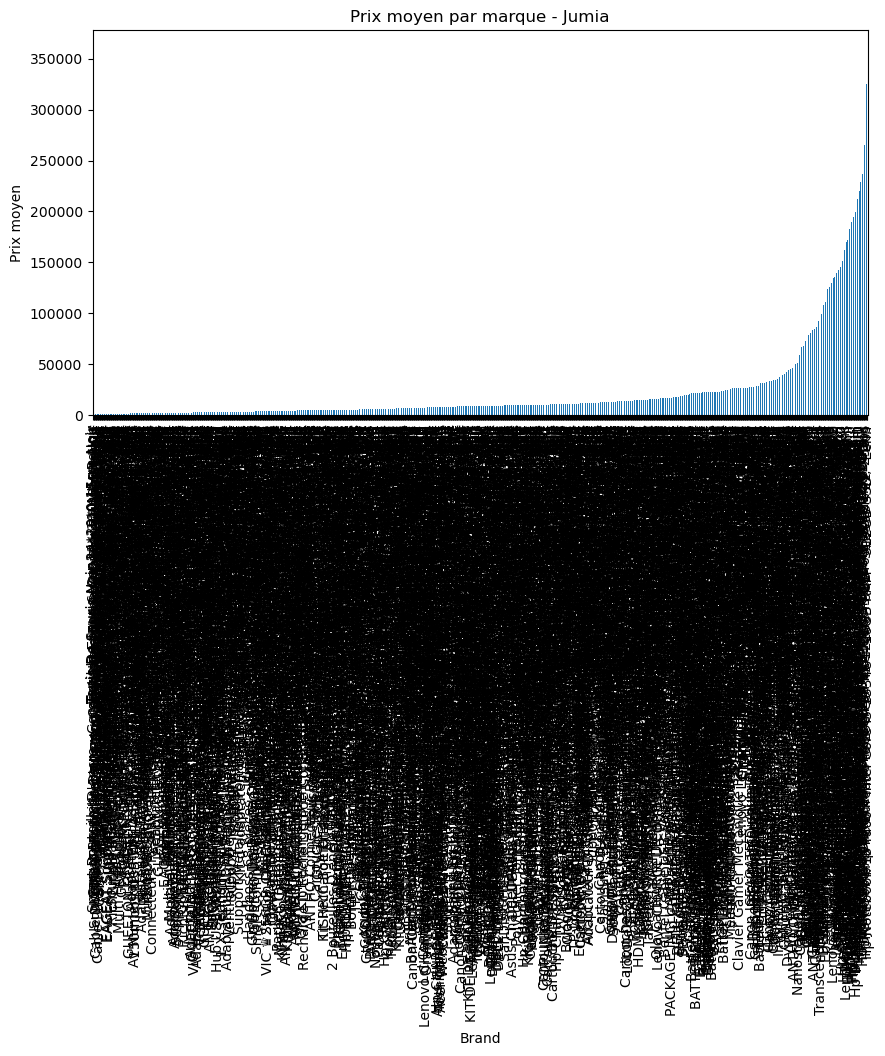

In [12]:
#📊 A. Prix moyen par marque (Jumia)
plt.figure(figsize=(10,5))
df_jumia.groupby("Brand_name")["Price"].mean().sort_values().plot(kind="bar")
plt.title("Prix moyen par marque - Jumia")
plt.xlabel("Brand")
plt.ylabel("Prix moyen")
plt.show()

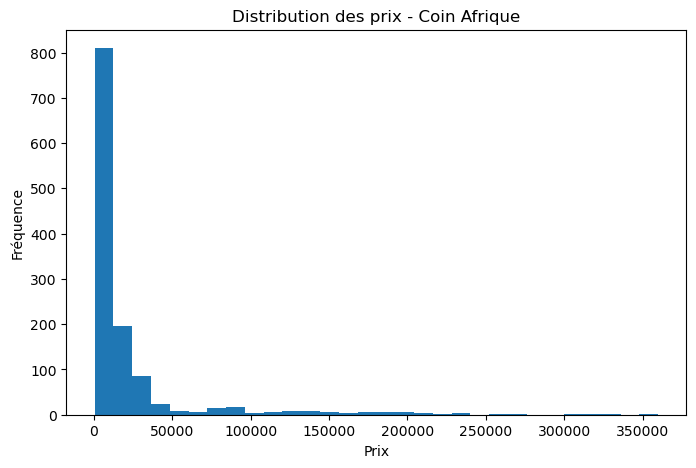

In [13]:
#📊 B. Distribution des prix
plt.figure(figsize=(8,5))
plt.hist(df_coin["Price"], bins=30)
plt.title("Distribution des prix - Coin Afrique")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

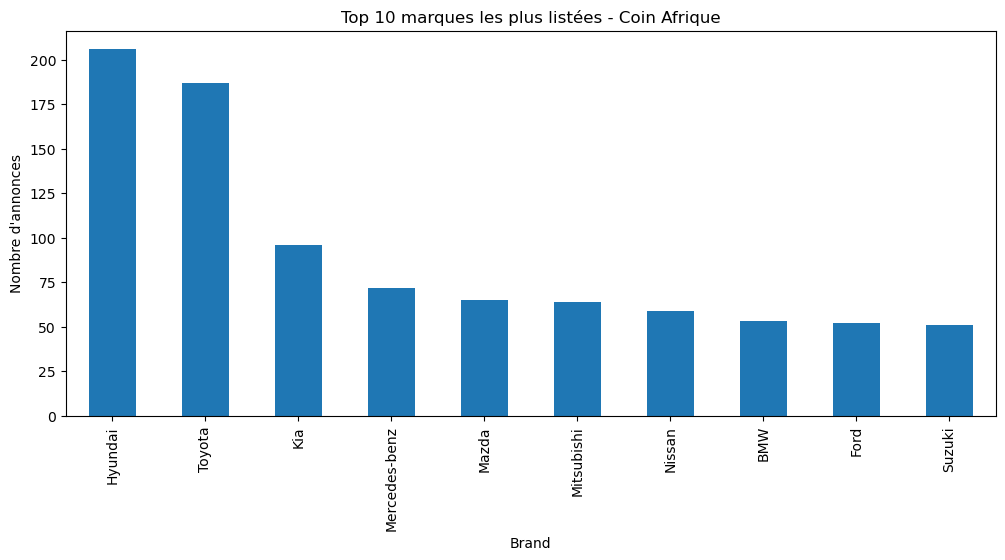

In [14]:
#📊 C. Top 10 marques Coin Afrique
plt.figure(figsize=(12,5))
df_coin["Brand"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 marques les plus listées - Coin Afrique")
plt.xlabel("Brand")
plt.ylabel("Nombre d'annonces")
plt.show()

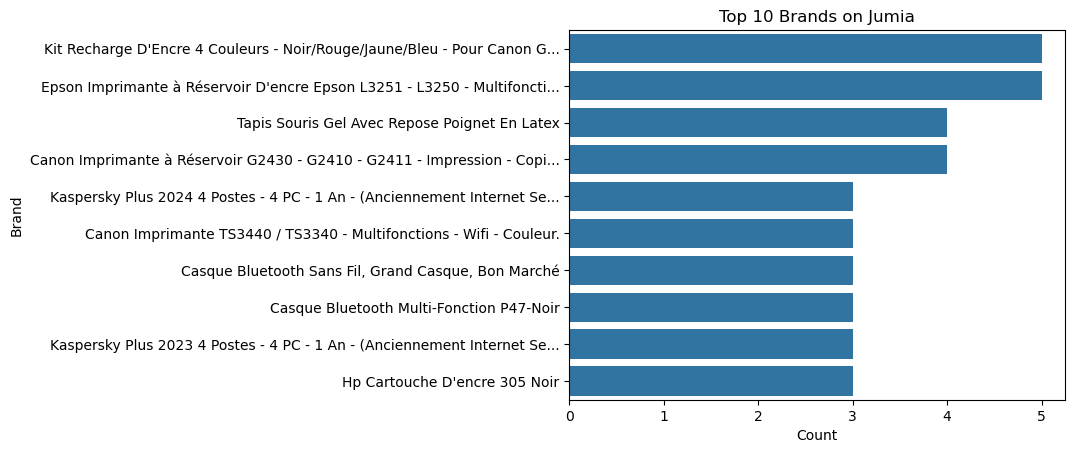

In [15]:
#5️⃣ Optional plots for website dashboard
import matplotlib.pyplot as plt
import seaborn as sns

# Most frequent brands
top_brands = df_jumia["Brand_name"].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Brands on Jumia")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()